In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
data = pd.read_csv(os.getcwd() + '/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
# A function for adding text
def text_writing(Yes, No, Yes_bars, No_bars):
    yes_perc = []
    no_perc = []
    for i in range(len(Yes)):
        yes_perc.append(int(round(Yes[i] / (Yes[i] + No[i]) * 100, 0)))
        no_perc.append(int(round(No[i] / (Yes[i] + No[i]) * 100, 0)))
    for y, n, i in zip(Yes_bars, No_bars, range(len(Yes))):
        ax.text(y.get_x() + y.get_width() / 2,
                y.get_height(),
                s = str(yes_perc[i]) + " %",
                horizontalalignment='center',
                verticalalignment='bottom')
        ax.text(n.get_x() + n.get_width() / 2,
                n.get_height(),
                s = str(no_perc[i]) + " %",
                horizontalalignment='center',
                verticalalignment='bottom')

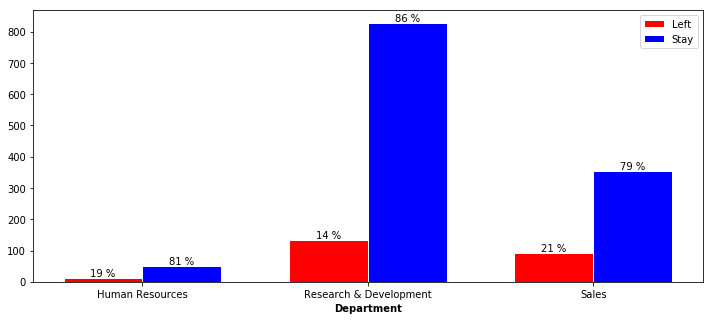

In [128]:
# Plot the attrition rate for each department with the y axis as count of employees
Yes = data.groupby(['Attrition', 'Department'])['EmployeeCount'].sum()['Yes'].reset_index(drop = True)
No = data.groupby(['Attrition', 'Department'])['EmployeeCount'].sum()['No'].reset_index(drop = True)
f, ax = plt.subplots(figsize=(12,5))
r1 = np.arange(len(Yes))
r2 = [x + 0.35 for x in r1]
Yes_bars = plt.bar(r1, Yes, color = "r", width = 0.35, edgecolor = 'white', label = 'Left')
No_bars = plt.bar(r2, No, color = "b", width = 0.35, edgecolor = 'white', label = 'Stay')
groups = ['Human Resources', 'Research & Development', 'Sales']
plt.xlabel('Department', fontweight='bold')
ax.set_xticks((r1+r2)/2)
ax.set_xticklabels(groups)
text_writing(Yes, No, Yes_bars, No_bars)
plt.legend()
plt.show()

So that we could get the result that the company's Research & Development department got most employees leaving but the Sales department has highest percentage leaving.

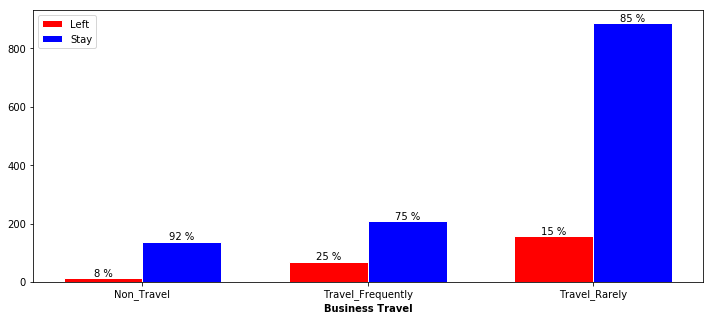

In [55]:
# Now we do a similar plot for Business Travel
# Plot the attrition rate for each department with the y axis as count of employees
Yes = data.groupby(['Attrition', 'BusinessTravel'])['EmployeeCount'].sum()['Yes'].reset_index(drop = True)
No = data.groupby(['Attrition', 'BusinessTravel'])['EmployeeCount'].sum()['No'].reset_index(drop = True)
f, ax = plt.subplots(figsize=(12,5))
r1 = np.arange(len(Yes))
r2 = [x + 0.35 for x in r1]
Yes_bars = plt.bar(r1, Yes, color = "r", width = 0.35, edgecolor = 'white', label = 'Left')
No_bars = plt.bar(r2, No, color = "b", width = 0.35, edgecolor = 'white', label = 'Stay')
groups = ['Non_Travel', 'Travel_Frequently', 'Travel_Rarely']
plt.xlabel('Business Travel', fontweight='bold')
ax.set_xticks((r1+r2)/2)
ax.set_xticklabels(groups)
text_writing(Yes, No, Yes_bars, No_bars)
plt.legend()
plt.show()

So apparently, this company's employees doesn't like travel.

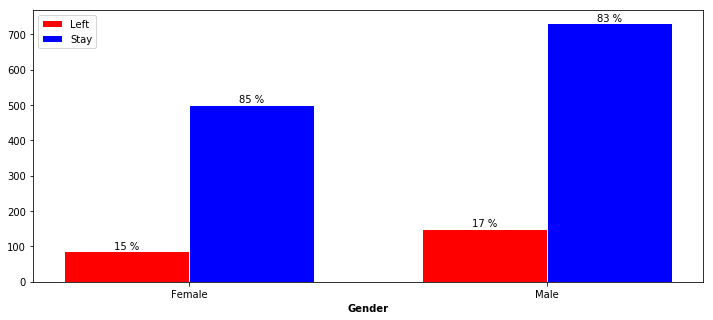

In [58]:
# Now we do a similar plot with gender
# Now we do a similar plot for Business Travel
# Plot the attrition rate for each department with the y axis as count of employees
Yes = data.groupby(['Attrition', 'Gender'])['EmployeeCount'].sum()['Yes'].reset_index(drop = True)
No = data.groupby(['Attrition', 'Gender'])['EmployeeCount'].sum()['No'].reset_index(drop = True)
f, ax = plt.subplots(figsize=(12,5))
r1 = np.arange(len(Yes))
r2 = [x + 0.35 for x in r1]
Yes_bars = plt.bar(r1, Yes, color = "r", width = 0.35, edgecolor = 'white', label = 'Left')
No_bars = plt.bar(r2, No, color = "b", width = 0.35, edgecolor = 'white', label = 'Stay')
groups = ['Female', 'Male']
plt.xlabel('Gender', fontweight='bold')
ax.set_xticks((r1+r2)/2)
ax.set_xticklabels(groups)
text_writing(Yes, No, Yes_bars, No_bars)
plt.legend()
plt.show()

In [111]:
age10_20 = np.array((data['Age'] <= 20).astype(int))
age20_30 = np.array((data['Age'] <= 30).astype(int))
age30_40 = np.array((data['Age'] <= 40).astype(int))
age40_50 = np.array((data['Age'] <= 50).astype(int))
age50_60 = np.array((data['Age'] <= 60).astype(int))
data['50-60'] = age50_60 - age40_50
data['40-50'] = age40_50 - age30_40
data['30-40'] = age30_40 - age20_30
data['20-30'] = age20_30 - age10_20
data['10-20'] = age10_20

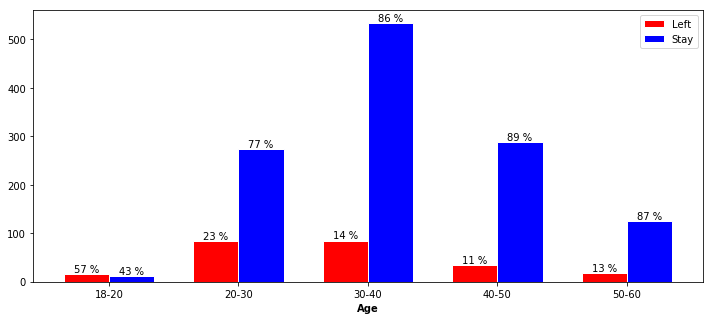

In [117]:
# Create one plot for age range and attrition
Yes_list = []
No_list = []
for i in range(1, 6):
    Yes_list.append(data.groupby(['Attrition', ''.join([str(i*10), '-', str(i*10+10)])])['EmployeeCount'].sum()['Yes'][1])
    No_list.append(data.groupby(['Attrition', ''.join([str(i*10), '-', str(i*10+10)])])['EmployeeCount'].sum()['No'][1])
f, ax = plt.subplots(figsize=(12,5))
r1 = np.arange(len(Yes_list))
r2 = [x + 0.35 for x in r1]
Yes_bars = plt.bar(r1, Yes_list, color = "r", width = 0.35, edgecolor = 'white', label = 'Left')
No_bars = plt.bar(r2, No_list, color = "b", width = 0.35, edgecolor = 'white', label = 'Stay')
groups = ['18-20', '20-30', '30-40', '40-50', '50-60']
plt.xlabel('Age', fontweight='bold')
ax.set_xticks((r1+r2)/2)
ax.set_xticklabels(groups)
text_writing(Yes_list, No_list, Yes_bars, No_bars)
plt.legend()
plt.show()

So it seems like the younger the employees are, the more likely they left the company.<br>
And also the employees are mostly 30-40 years old.

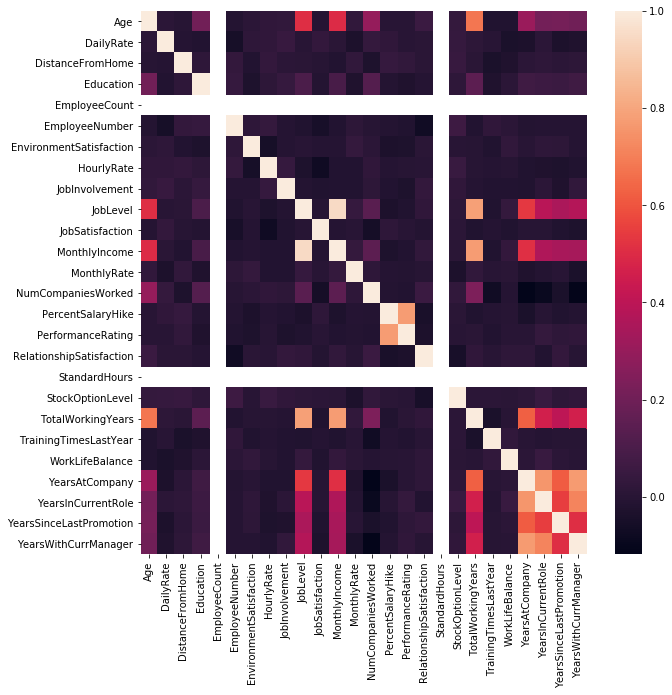

In [135]:
# Now create a heatmap to describe different correlations between features
import seaborn
# Find correlation between faetures
correlation = data.drop(data.columns[-6:], axis = 1).corr()
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(correlation,xticklabels = correlation.columns,yticklabels = correlation.columns)
plt.show()

In [136]:
# The above graph is not looking good....
# So first let's see the correlation dataframe
correlation
# Not looking good as well(it only contains numeric features)
# So I think I will use mutual information to decide the features that could predict the target variable well
#       in the other file.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
